In [2]:
import pandas as pd
import numpy as np

In [8]:
from python.listingspreprocessing import ListingsPreprocessing

In [28]:
listdf = ListingsPreprocessing('../data/2018_04_14/listings.csv').do_preprocessing()
folder = ['2018_05_17','2018_07_17','2018_08_16','2018_09_14','2018_10_11','2018_11_15','2018_12_13','2019_01_17','2019_02_09']
for f in folder:
    testdf = ListingsPreprocessing('../data/'+f+'/listings.csv').do_preprocessing()
    listdf = pd.concat([listdf,testdf],ignore_index=True,sort='False')

In [44]:
listdf.columns.values

array(['Adams', 'Alki', 'Arbor Heights', 'Atlantic', 'Belltown',
       'Bitter Lake', 'Briarcliff', 'Brighton', 'Broadview', 'Broadway',
       'Bryant', 'Cedar Park', 'Central Business District',
       'Columbia City', 'Crown Hill', 'Dunlap', 'East Queen Anne',
       'Eastlake', 'Fairmount Park', 'Fauntleroy', 'First Hill',
       'Fremont', 'Gatewood', 'Genesee', 'Georgetown', 'Green Lake',
       'Greenwood', 'Haller Lake', 'Harrison/Denny-Blaine', 'High Point',
       'Highland Park', 'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Lawton Park', 'Leschi',
       'Lower Queen Anne', 'Loyal Heights', 'Madison Park', 'Madrona',
       'Mann', 'Maple Leaf', 'Matthews Beach', 'Meadowbrook',
       'Mid-Beacon Hill', 'Minor', 'Montlake', 'Mount Baker',
       'North Admiral', 'North Beach/Blue Ridge', 'North Beacon Hill',
       'North College Park', 'North Delridge', 'North Queen Anne',
       'Olympic Hills', 'Phinney Ridge', 'Pike-M

In [35]:
listdf['price_log10'] = listdf['price'].apply(lambda x: np.log10(x))
listdf['maxnights_log2'] = listdf['maximum_nights'].apply(lambda x: np.log2(x))
listdf['minnights_log2'] = listdf['minimum_nights'].apply(lambda x: np.log2(x))

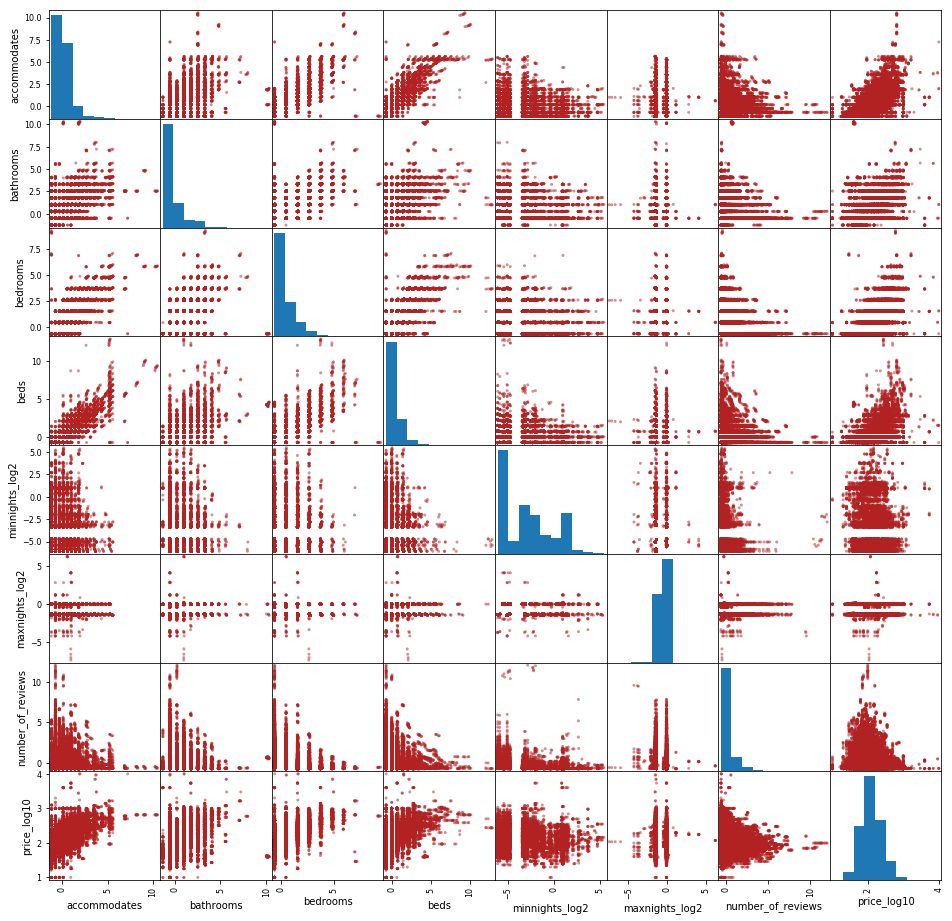

In [42]:
matrix_cols = ['accommodates', 'bathrooms', 'bedrooms',
       'beds','minnights_log2','maxnights_log2','number_of_reviews','price_log10']
axs = pd.plotting.scatter_matrix(listdf[matrix_cols],figsize=(16,16),c='firebrick')

In [3]:
fl = '../save/2018_04_14.csv'
df = pd.read_csv(fl)

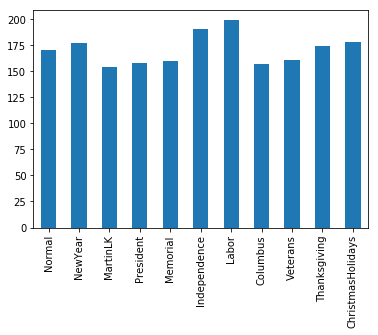

In [60]:
holidays = ['NewYear','MartinLK','President','Memorial','Independence','Labor','Columbus','Veterans','Thanksgiving','ChristmasHolidays']
hdf = df.groupby(list(reversed(holidays)))['price'].mean().to_frame().reset_index(drop=True)#.plot(kind='bar')
holidays.insert(0,'Normal')
hdf.index = holidays
#hdf = hdf.apply(lambda x: x-float(hdf.iloc[0].values))
hdf.plot(kind='bar',legend=False) #title='Relative Price of Different Holidays'
#